**Create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('penguins_size.csv')
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

#**Data Understanding:**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.shape

(344, 7)

In [5]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [6]:
df.size

2408

In [7]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [8]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [9]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [10]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [11]:
df = df[df['sex'] != '.']
df.shape

(343, 7)

#**Exploratory Data Analysis**

<Axes: ylabel='culmen_length_mm'>

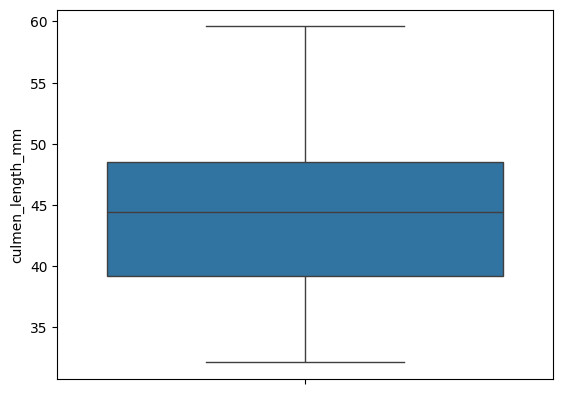

In [12]:
sns.boxplot(df['culmen_length_mm'])

<Axes: ylabel='culmen_depth_mm'>

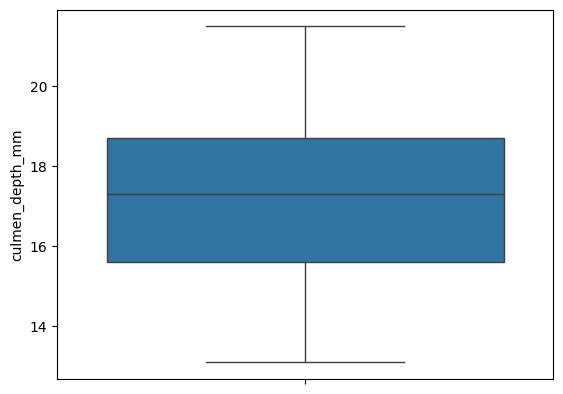

In [13]:
sns.boxplot(df['culmen_depth_mm'])

<Axes: ylabel='flipper_length_mm'>

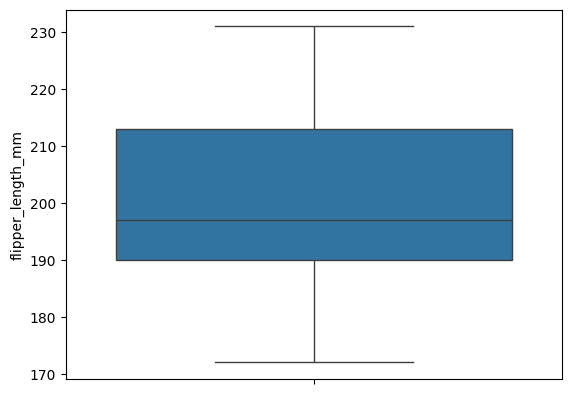

In [14]:
sns.boxplot(df['flipper_length_mm'])

<Axes: ylabel='body_mass_g'>

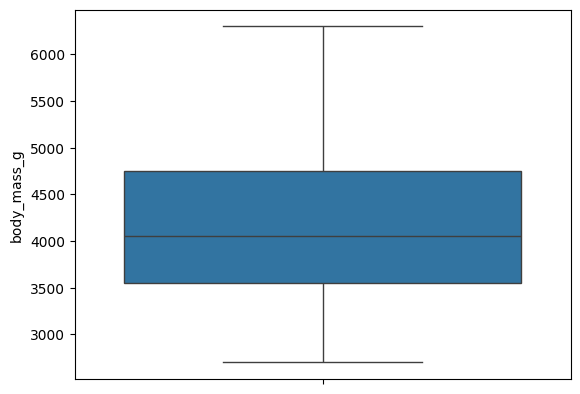

In [15]:
sns.boxplot(df['body_mass_g'])

<Axes: xlabel='species', ylabel='count'>

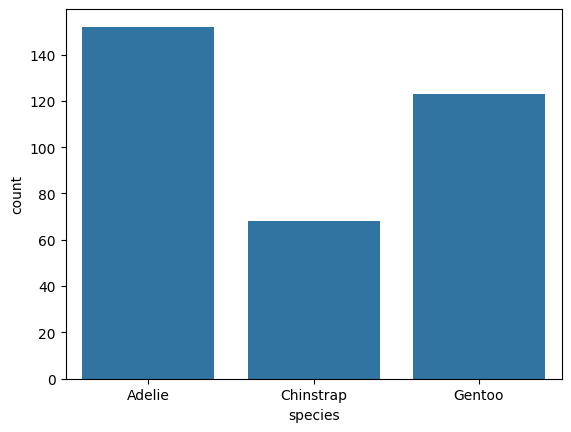

In [16]:
sns.countplot(data = df,x='species')

<Axes: xlabel='island', ylabel='count'>

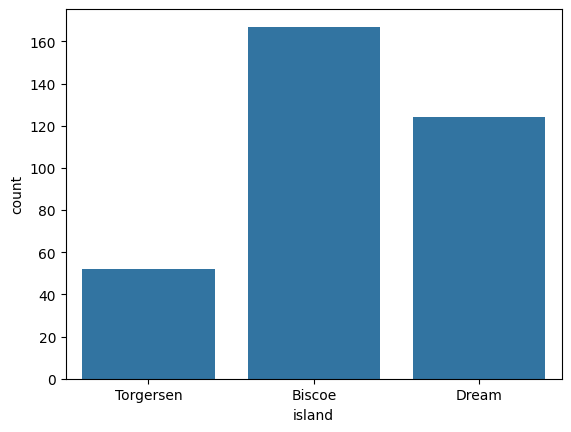

In [17]:
sns.countplot(data = df, x='island')

<Axes: xlabel='sex', ylabel='count'>

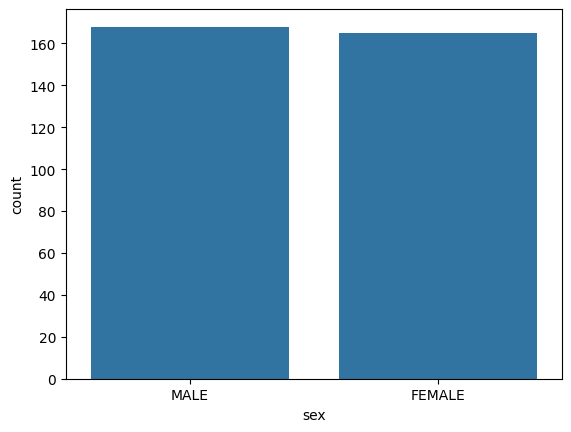

In [18]:
sns.countplot(data = df, x='sex')

In [19]:
pd.crosstab(df['species'], df['island'], margins = True)

island     Biscoe  Dream  Torgersen  All
species                                 
Adelie         44     56         52  152
Chinstrap       0     68          0   68
Gentoo        123      0          0  123
All           167    124         52  343

In [20]:
pd.crosstab(df['species'], df['sex'], margins = True)

sex        FEMALE  MALE  All
species                     
Adelie         73    73  146
Chinstrap      34    34   68
Gentoo         58    61  119
All           165   168  333

In [21]:
df.describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        341.000000       341.000000         341.000000   341.000000
mean          43.920235        17.155425         200.868035  4199.780059
std            5.467516         1.976124          14.055255   802.300201
min           32.100000        13.100000         172.000000  2700.000000
25%           39.200000        15.600000         190.000000  3550.000000
50%           44.400000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

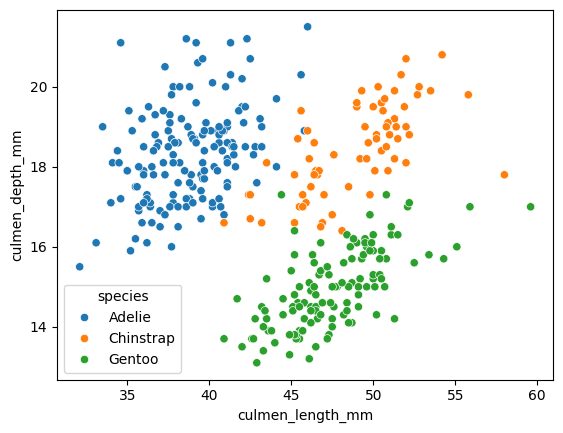

In [22]:
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', hue='species')

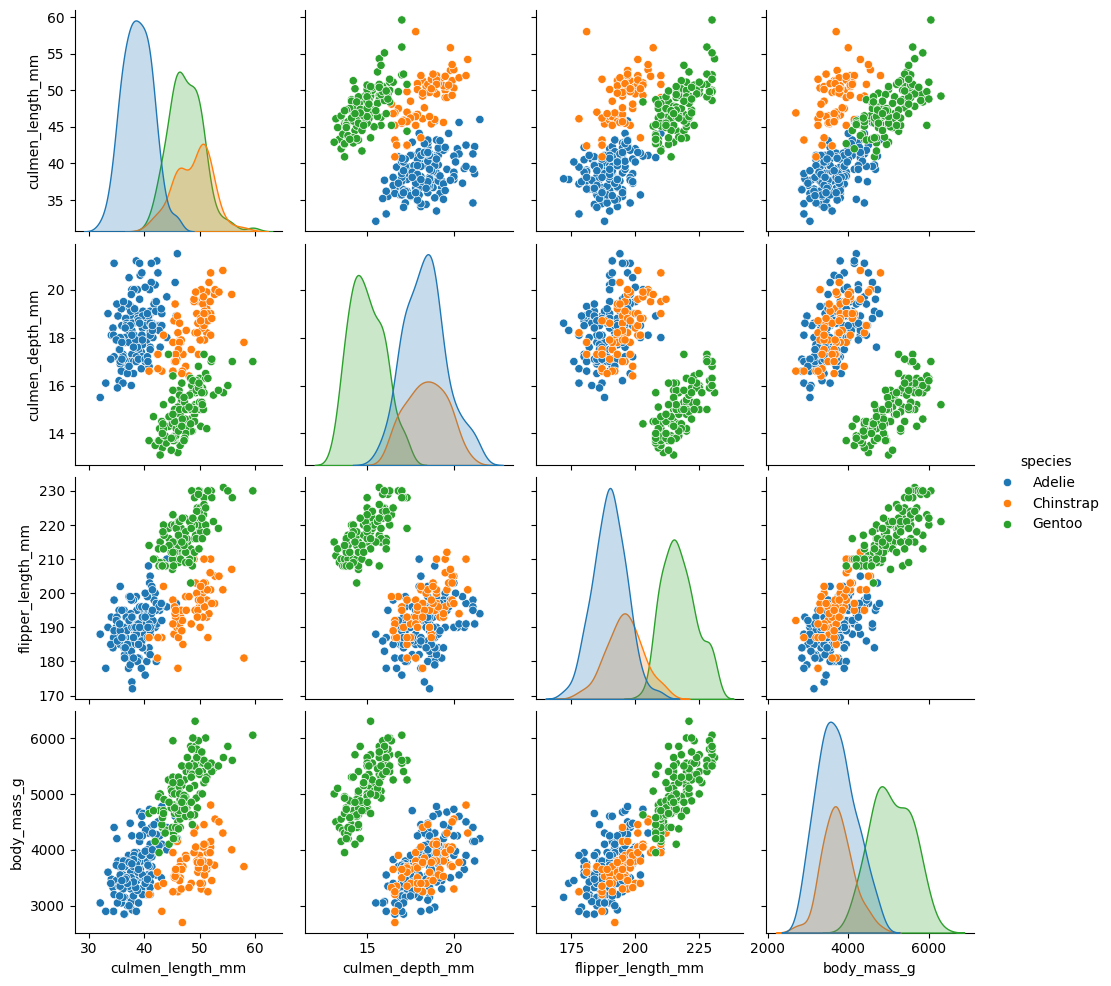

In [23]:
sns.pairplot(df, hue='species')

In [24]:
df.select_dtypes(include= np.number).corr()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.235015           0.657102   
culmen_depth_mm           -0.235015         1.000000          -0.582964   
flipper_length_mm          0.657102        -0.582964           1.000000   
body_mass_g                0.595476        -0.470963           0.870956   

                   body_mass_g  
culmen_length_mm      0.595476  
culmen_depth_mm      -0.470963  
flipper_length_mm     0.870956  
body_mass_g           1.000000

<Axes: >

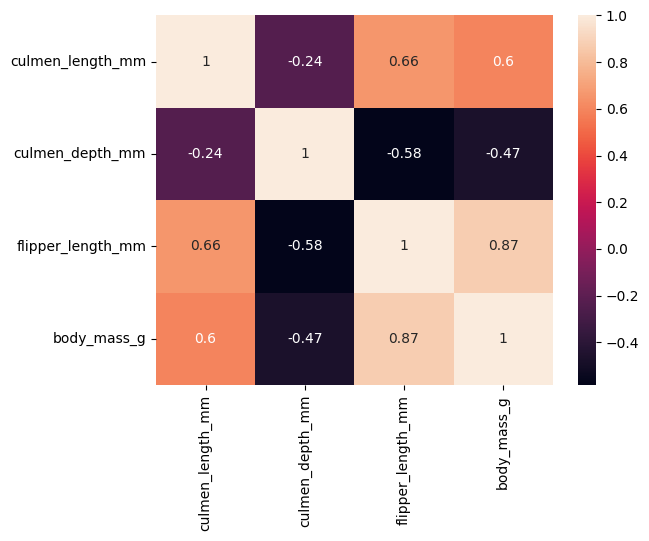

In [25]:
sns.heatmap(df.select_dtypes(include= np.number).corr(), annot=True)

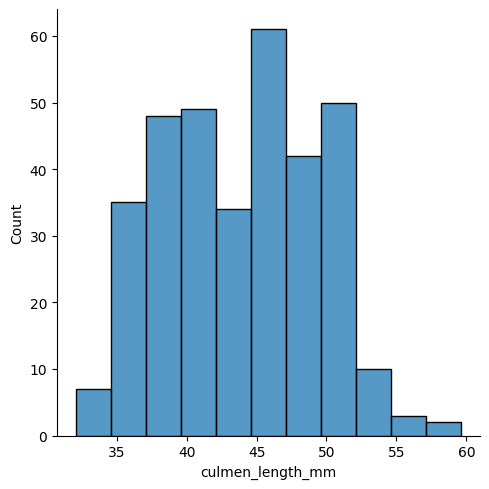

In [26]:
sns.displot(df.culmen_length_mm)

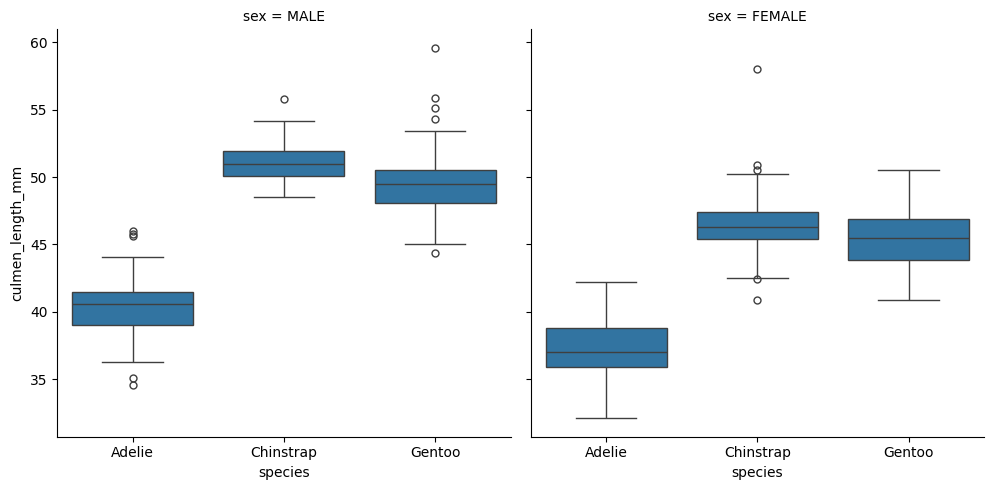

In [27]:
sns.catplot(data=df , x='species', y='culmen_length_mm', kind= 'box', col='sex')

In [28]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

#**Data Preprocessing:**

**Replacing the Missing Values**

In [29]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace = True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(), inplace = True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace = True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace = True)
df['sex'].fillna(df['sex'].mode()[0], inplace = True)

/tmp/ipython-input-646676012.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace = True)
/tmp/ipython-input-646676012.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [30]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

**Encoding**

In [31]:
pd.get_dummies(df.drop('species', axis=1), drop_first= True)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0           39.100000        18.700000         181.000000  3750.000000   
1           39.500000        17.400000         186.000000  3800.000000   
2           40.300000        18.000000         195.000000  3250.000000   
3           43.920235        17.155425         200.868035  4199.780059   
4           36.700000        19.300000         193.000000  3450.000000   
..                ...              ...                ...          ...   
339         43.920235        17.155425         200.868035  4199.780059   
340         46.800000        14.300000         215.000000  4850.000000   
341         50.400000        15.700000         222.000000  5750.000000   
342         45.200000        14.800000         212.000000  5200.000000   
343         49.900000        16.100000         213.000000  5400.000000   

     island_Dream  island_Torgersen  sex_MALE  
0           False              True      True  
1           False              True     False  
2           False              True     False  
3           False              True      True  
4           False              True     False  
..            ...               ...       ...  
339         False             False      True  
340         False             False     False  
341         False             False      True  
342         False             False     False  
343         False             False      True  

[343 rows x 7 columns]

In [32]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first= True)
y=  df['species']

# **Train Test Split**

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.3, random_state=42)

# **Modeling**

In [34]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# **Prediction**

In [35]:
ypred_train = DT_model.predict(X_train)
ypred_test = DT_model.predict(X_test)

# **Evaluation**

In [36]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

1.0
0.9805825242718447


In [37]:
# cross validation score

from sklearn.model_selection import cross_val_score
CV_score=cross_val_score(DT_model ,X,y,cv=5)
print(CV_score)

CV_score.mean()

[0.98550725 0.98550725 0.98550725 0.95588235 0.95588235]


np.float64(0.9736572890025575)

In [38]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[50,  0,  0],
       [ 1, 17,  0],
       [ 1,  0, 34]])

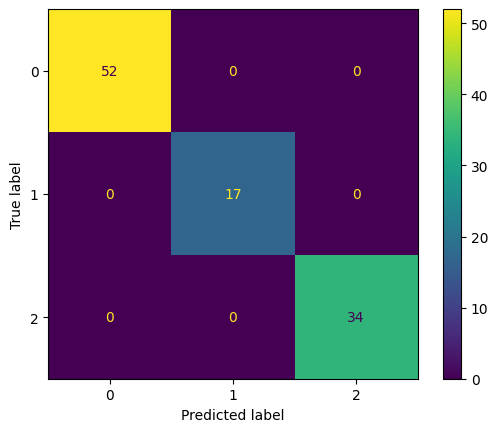

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = DT_model.predict(X_test)

cm = confusion_matrix(ypred_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        50
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      0.97      0.99        35

    accuracy                           0.98       103
   macro avg       0.99      0.97      0.98       103
weighted avg       0.98      0.98      0.98       103



In [41]:
DT_model.feature_importances_

array([0.37371194, 0.07402803, 0.5065862 , 0.01298982, 0.032684  ,
       0.        , 0.        ])

In [42]:
pd.DataFrame(index=X.columns,data=DT_model.feature_importances_,columns=['feature importance'])

feature importance
culmen_length_mm             0.373712
culmen_depth_mm              0.074028
flipper_length_mm            0.506586
body_mass_g                  0.012990
island_Dream                 0.032684
island_Torgersen             0.000000
sex_MALE                     0.000000

# **visualized the tree**

In [43]:
from sklearn.tree import plot_tree

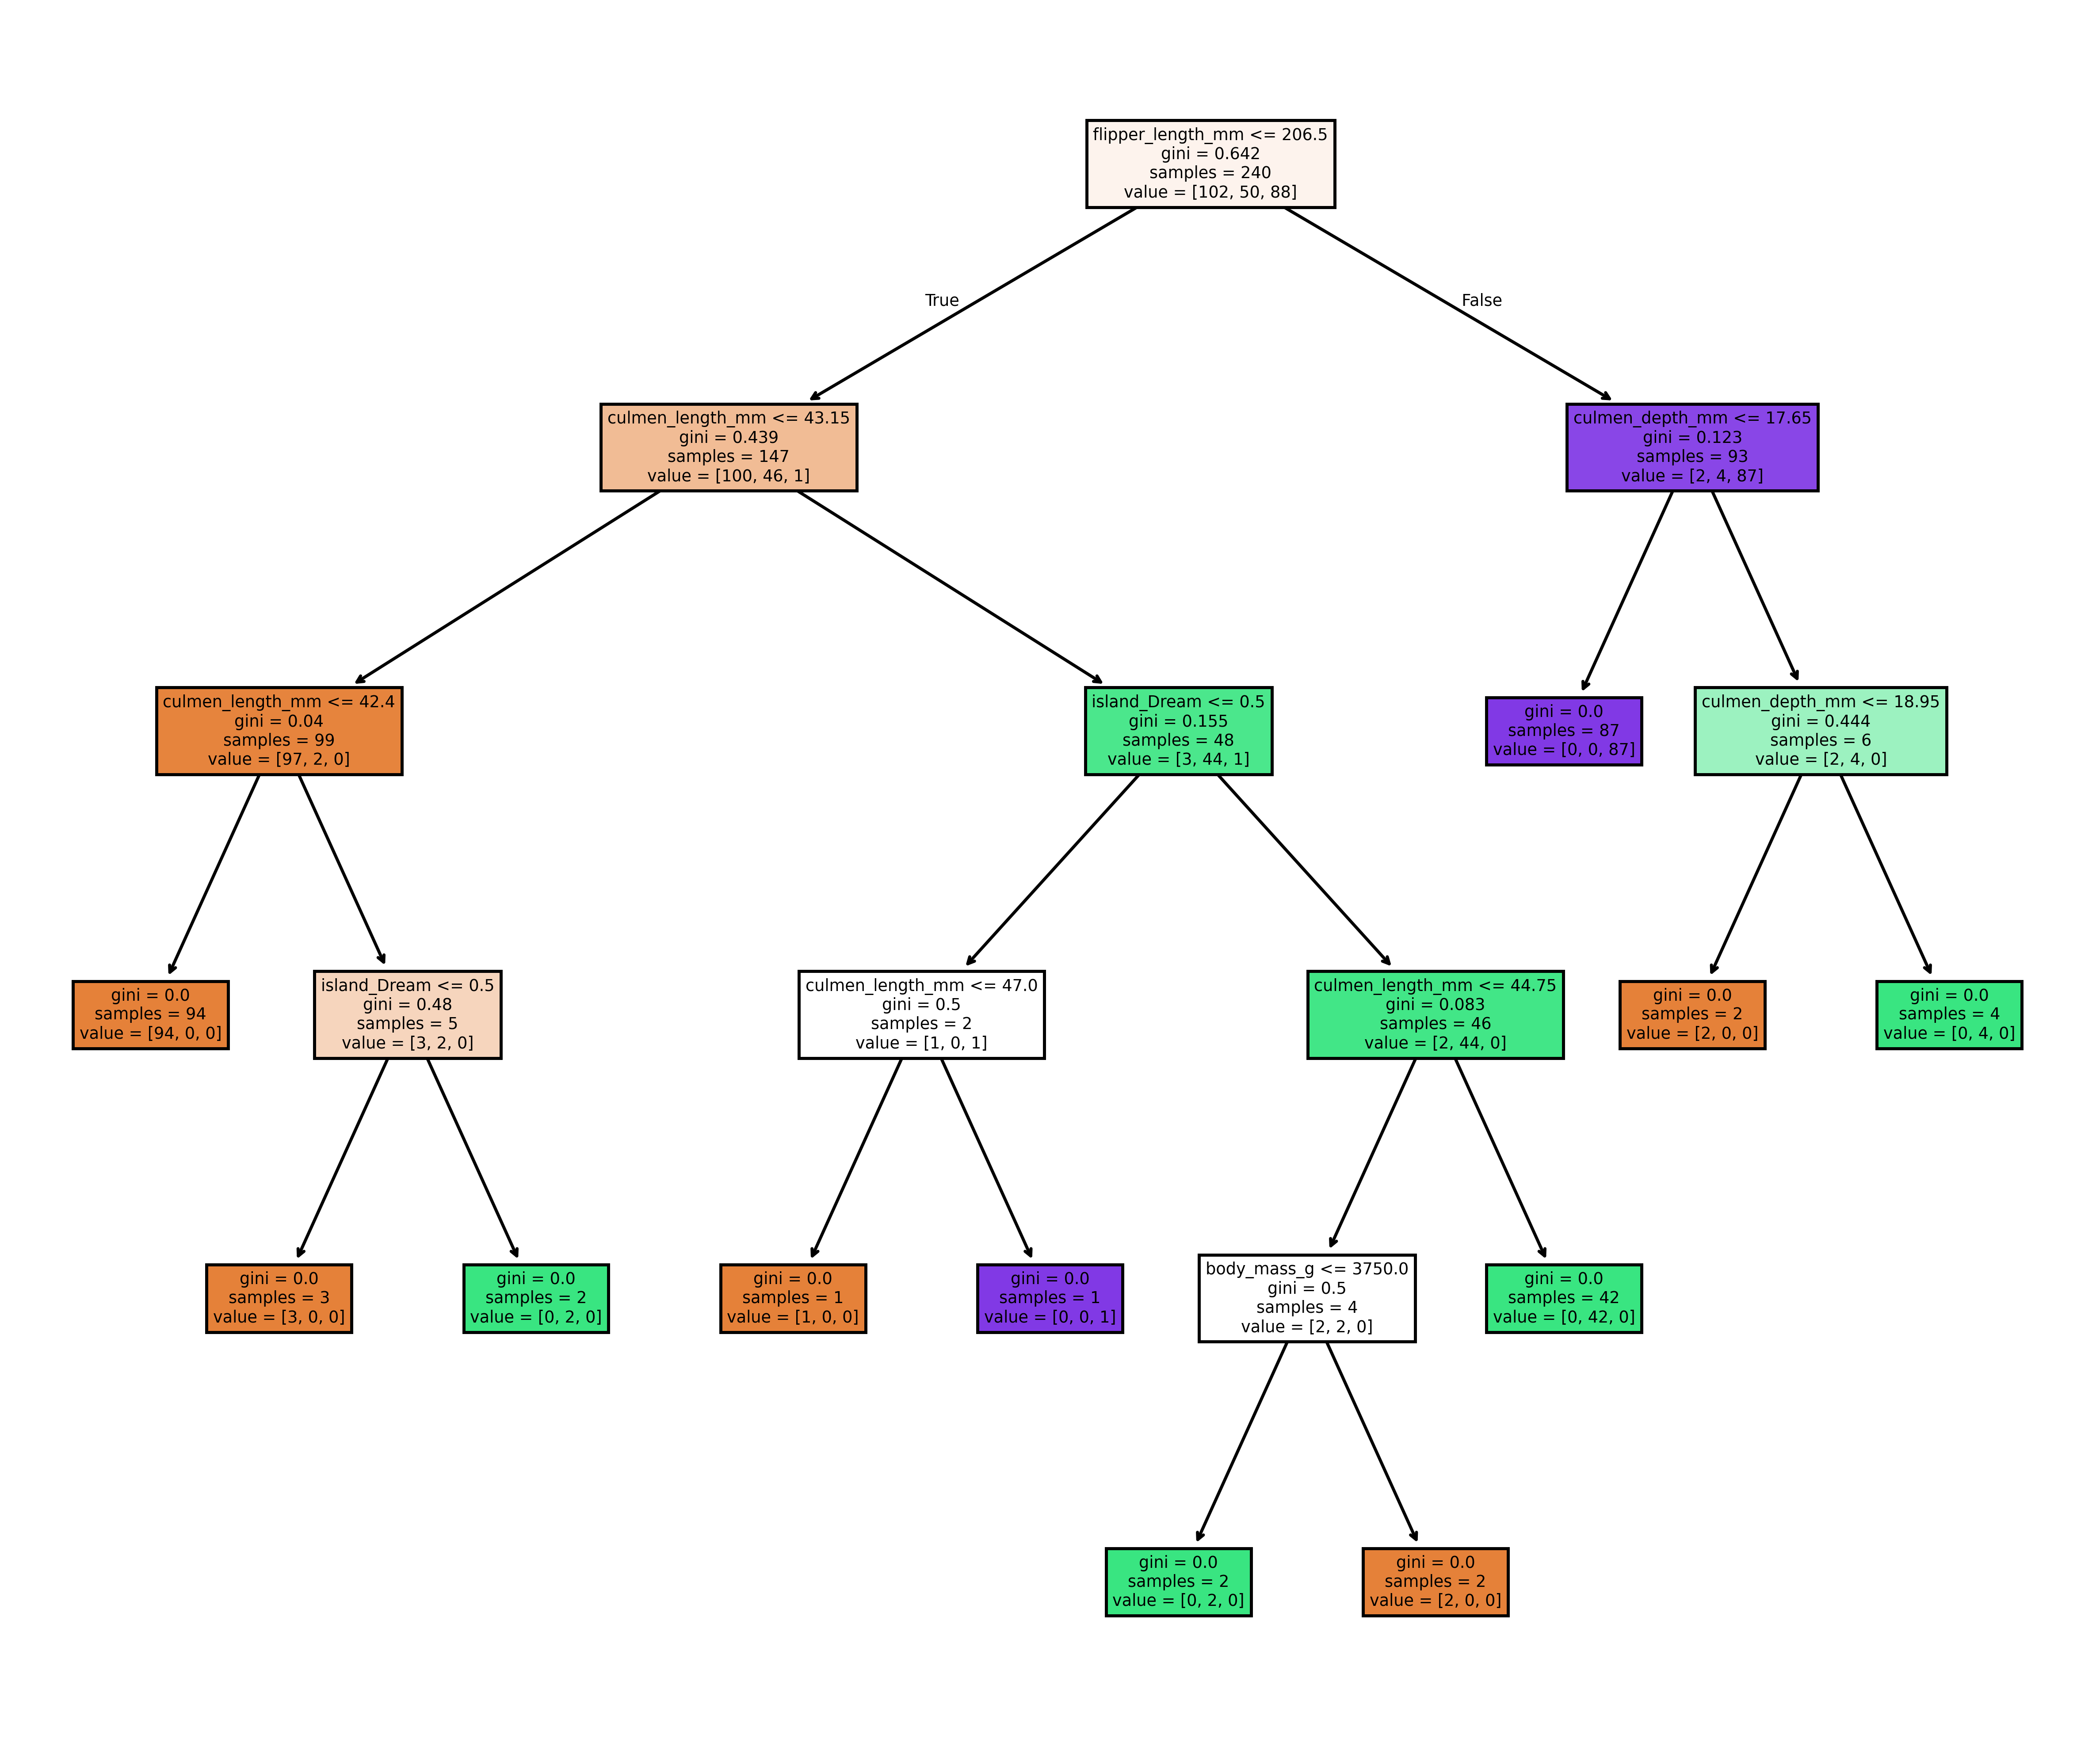

In [44]:
plt.figure(figsize=(12,10), dpi= 500)
plot_tree(DT_model, filled = True, feature_names = X.columns)
plt.show()

# **Optimization - Pruning of Decision Tree**

**Max Depth**

Train accuracy: 1.0
Test accuracy: 0.9805825242718447
[0.98550725 0.98550725 0.98550725 0.95588235 0.95588235]


np.float64(0.9736572890025575)

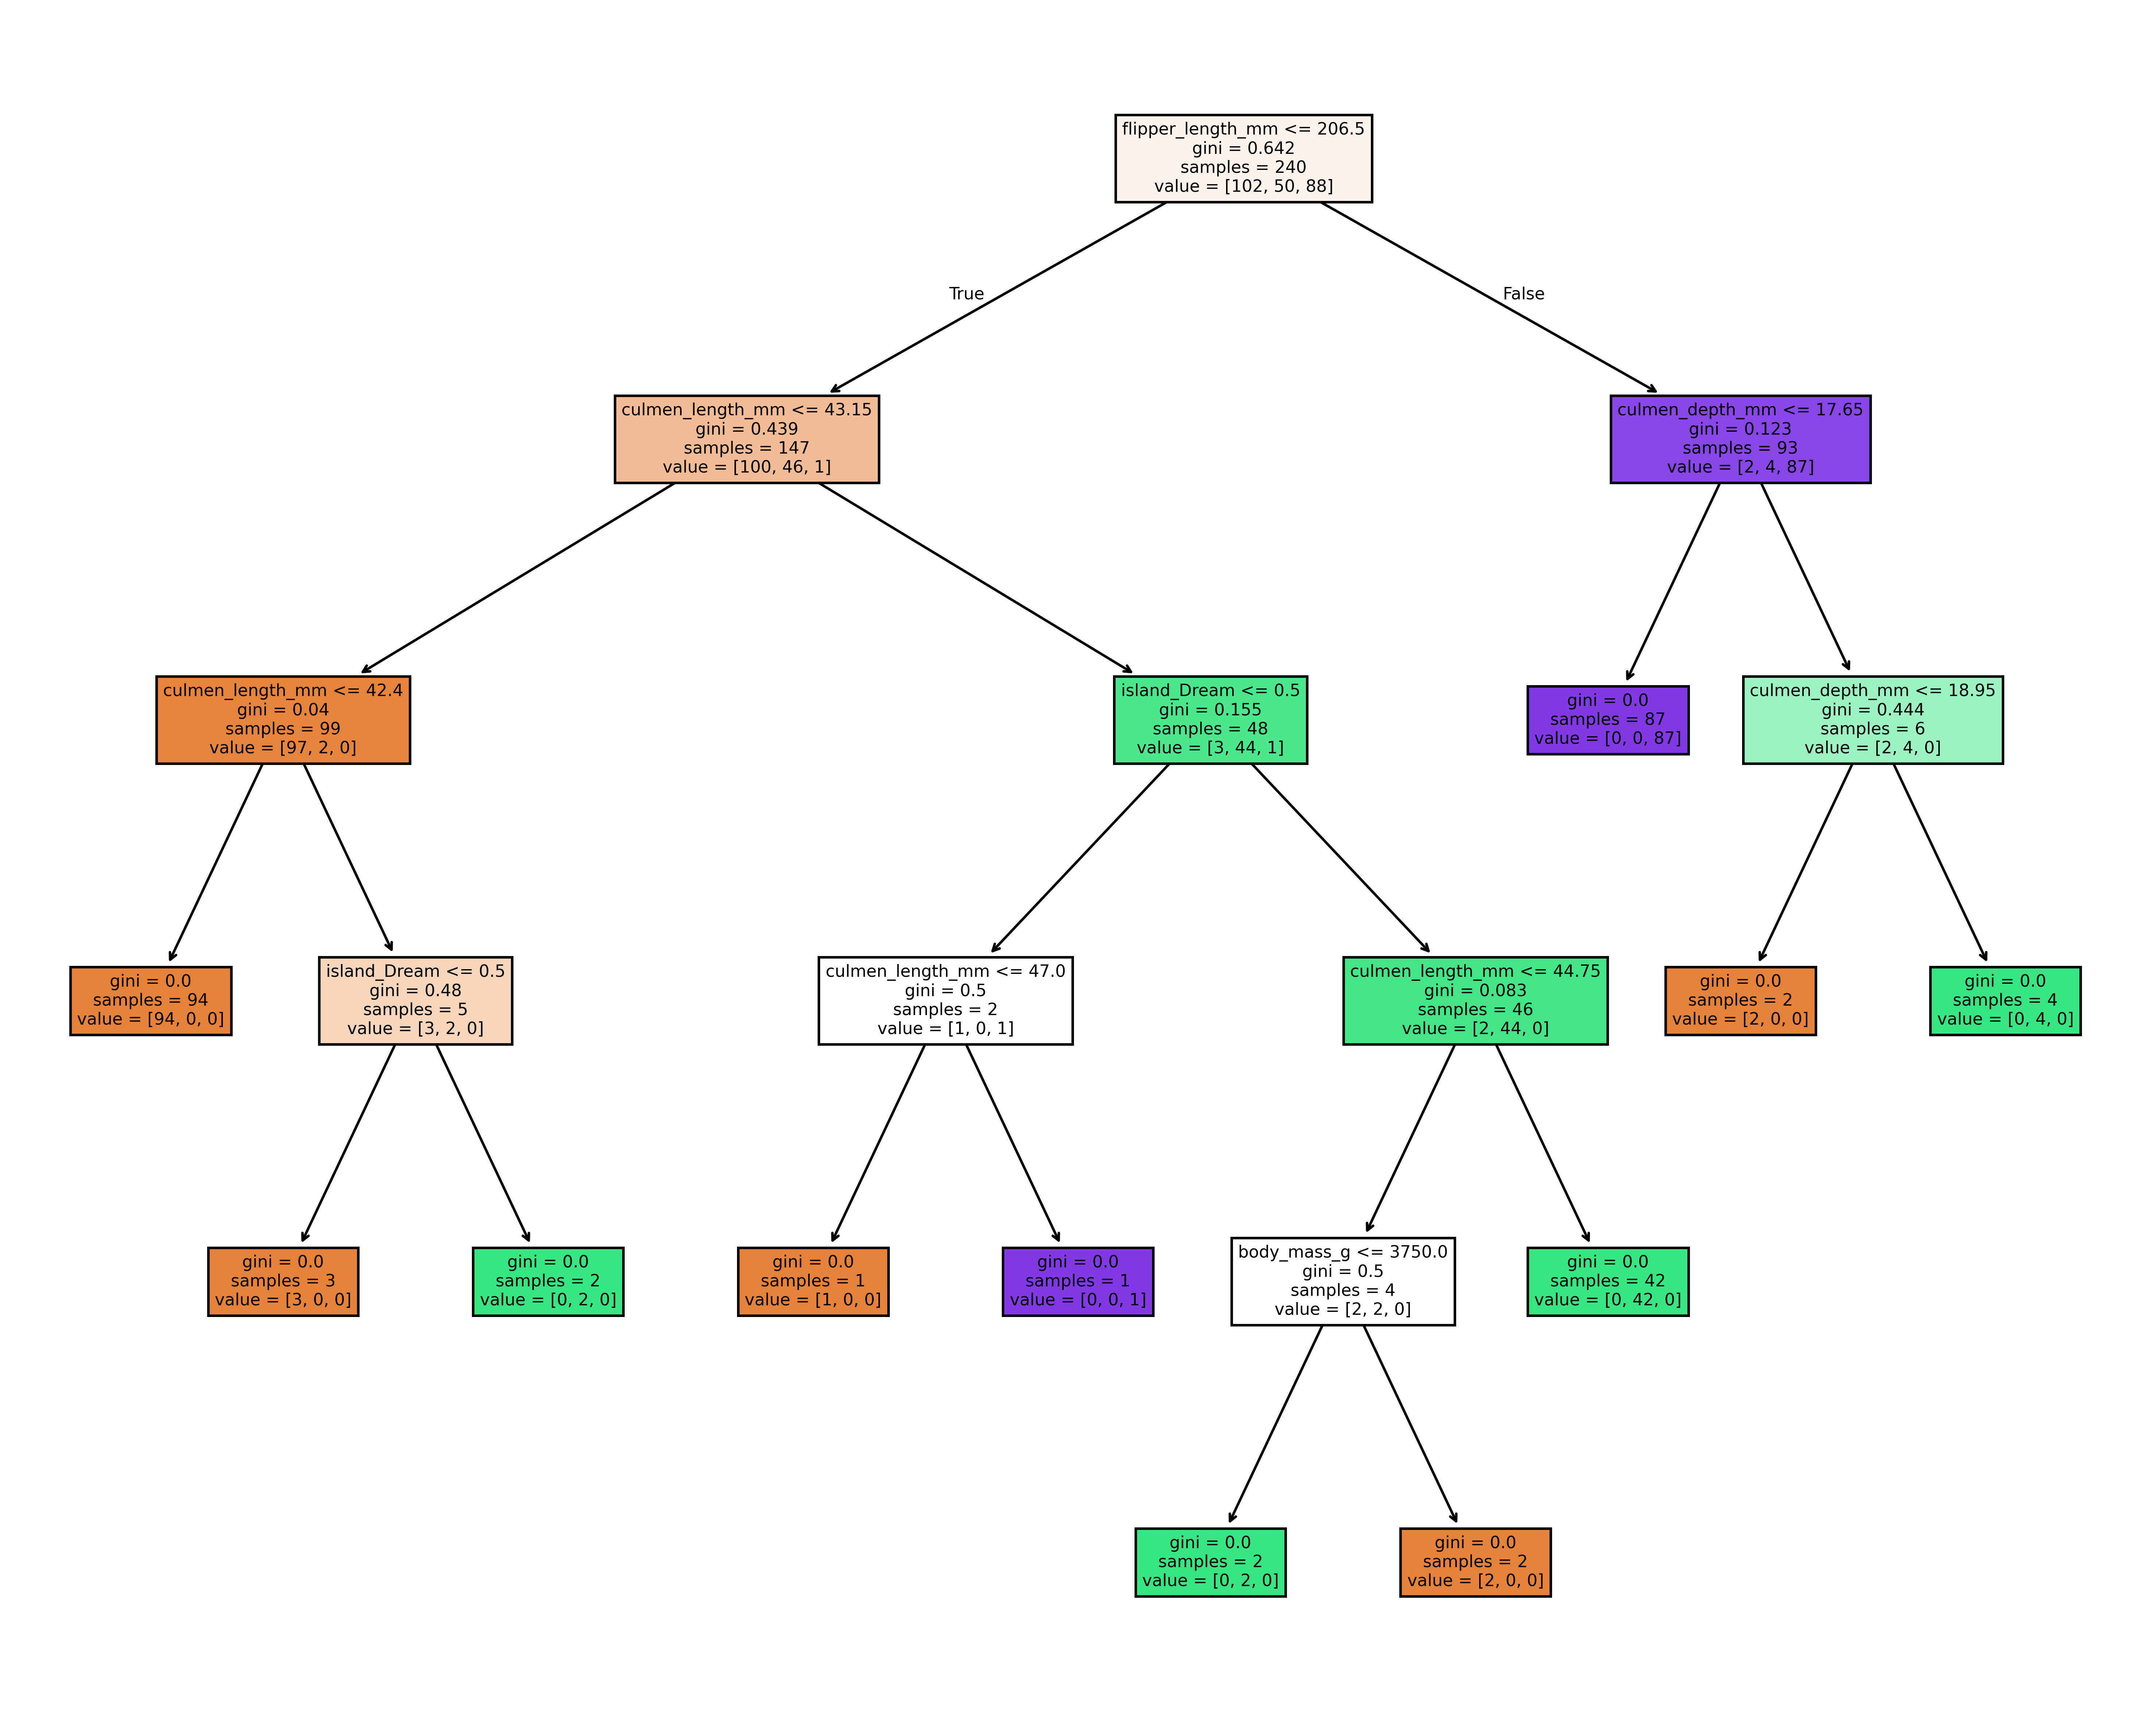

In [45]:
pruned_tree = DecisionTreeClassifier(random_state=42, max_depth=5)
def model_eval(DT_model):
  DT_model.fit(X_train,y_train)
  ypred_train=DT_model.predict(X_train)
  ypred_test= DT_model.predict(X_test)

  print('Train accuracy:' , accuracy_score(y_train,ypred_train))
  print('Test accuracy:' , accuracy_score(y_test,ypred_test))

  plt.figure(figsize=(15,12),dpi=500)
  plot_tree(DT_model,filled=True,feature_names=X.columns)
model_eval(pruned_tree)

score= cross_val_score(DT_model,X,y,cv=5)
print(score)
score.mean()

Train accuracy: 0.9875
Test accuracy: 0.970873786407767
[0.98550725 0.98550725 0.98550725 0.95588235 0.95588235]


np.float64(0.9736572890025575)

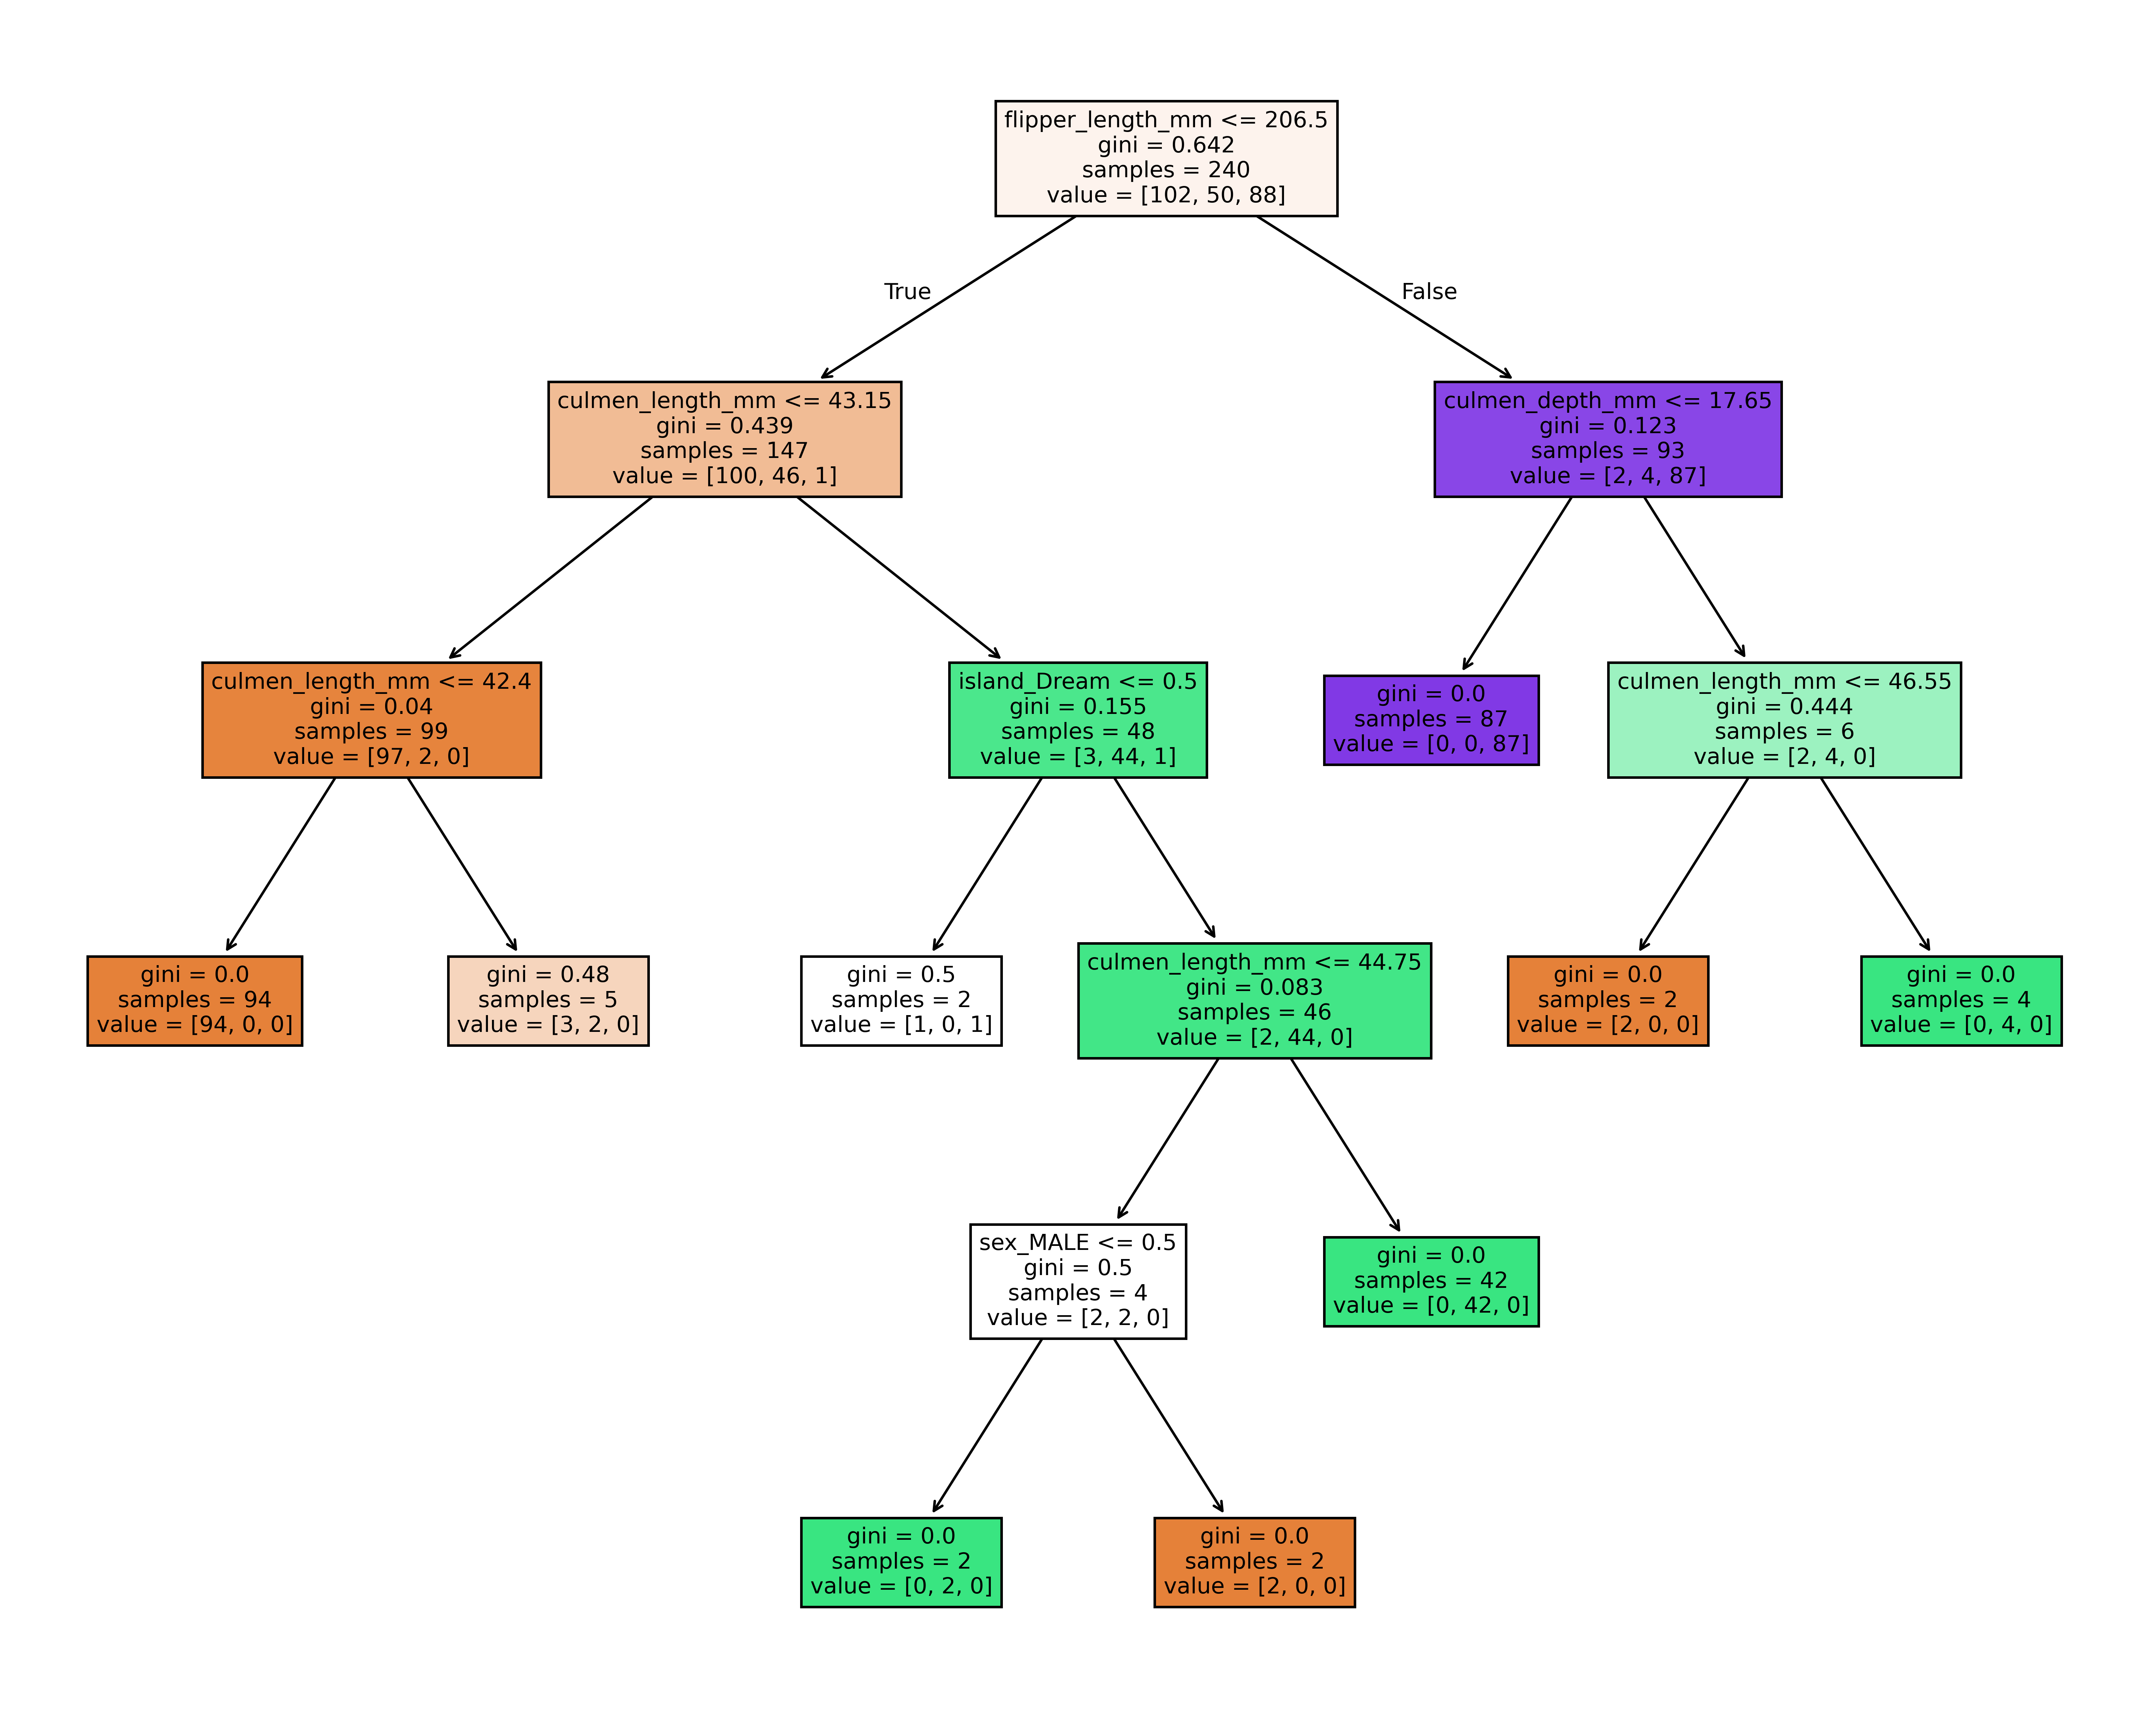

In [46]:
pruned_tree = DecisionTreeClassifier(random_state=42,max_leaf_nodes=9)
model_eval(pruned_tree)

score= cross_val_score(DT_model,X,y,cv=5)
print(score)
score.mean()

In [47]:
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier(random_state = 42)
param_grid = {'max_leaf_nodes' : list(range(1,30)), 'criterion':['gini','entropy']}
HPT_DT_model = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
HPT_DT_model.fit(X_train, y_train)
HPT_DT_model.best_params_

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

{'criterion': 'gini', 'max_leaf_nodes': 11}

In [48]:
from sklearn.model_selection import GridSearchCV

estimator=DecisionTreeClassifier(random_state=101)
param_grid= {'max_depth' : list(range(1,15)),'criterion':['gini','entropy']}

HPT_DT_model= GridSearchCV(estimator,param_grid,cv=5, scoring='accuracy')

HPT_DT_model.fit(X_train,y_train)

HPT_DT_model.best_params_

{'criterion': 'gini', 'max_depth': 4}

# **Rebuilt the final model**

Train accuracy: 1.0
Test accuracy: 0.9805825242718447
[0.98550725 0.98550725 0.98550725 0.95588235 0.97058824]


np.float64(0.9765984654731458)

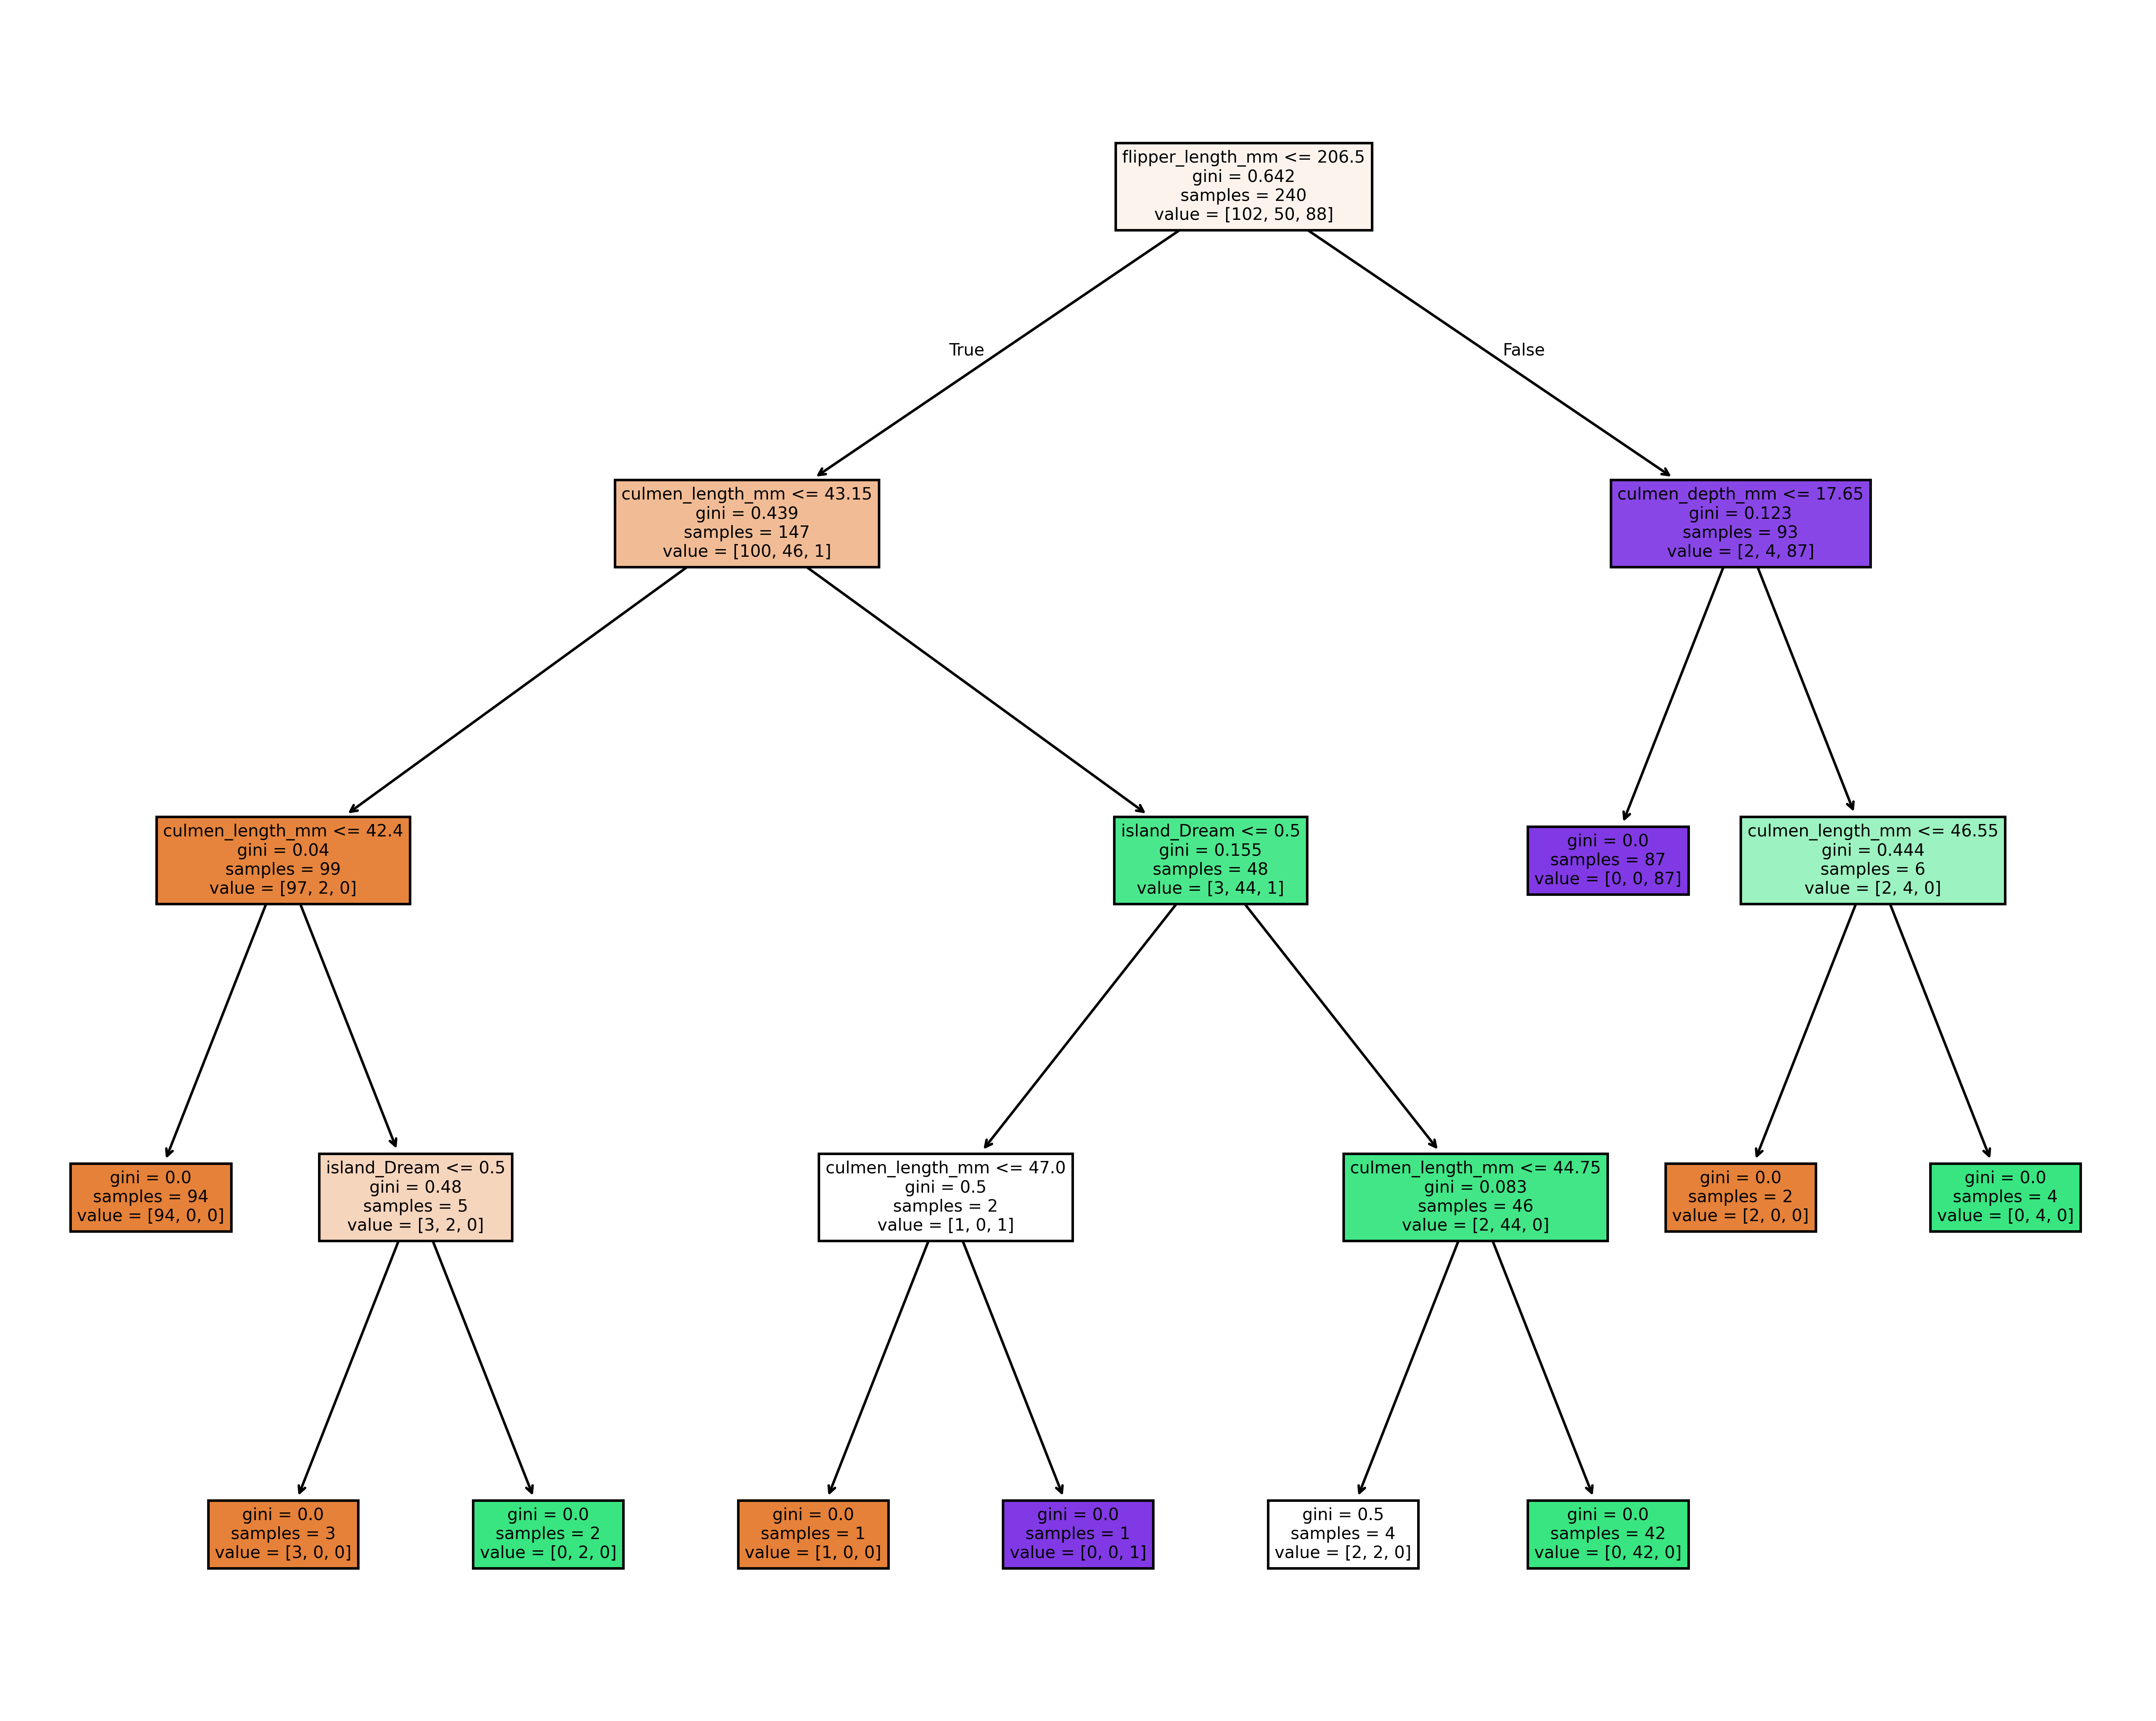

In [49]:
DT_model=DecisionTreeClassifier(random_state=42,max_depth=4)
DT_model.fit(X_train,y_train)

train_pred=DT_model.predict(X_train)
test_pred= DT_model.predict(X_test)

print('Train accuracy:' , accuracy_score(y_train,ypred_train))
print('Test accuracy:' , accuracy_score(y_test,ypred_test))

plt.figure(figsize=(15,12),dpi=500)
plot_tree(DT_model,filled=True,feature_names=X.columns)

score= cross_val_score(DT_model,X,y,cv=5)
print(score)
score.mean()

Train accuracy: 1.0
Test accuracy: 0.9805825242718447
[0.98550725 0.98550725 0.98550725 0.97058824 0.94117647]


np.float64(0.9736572890025575)

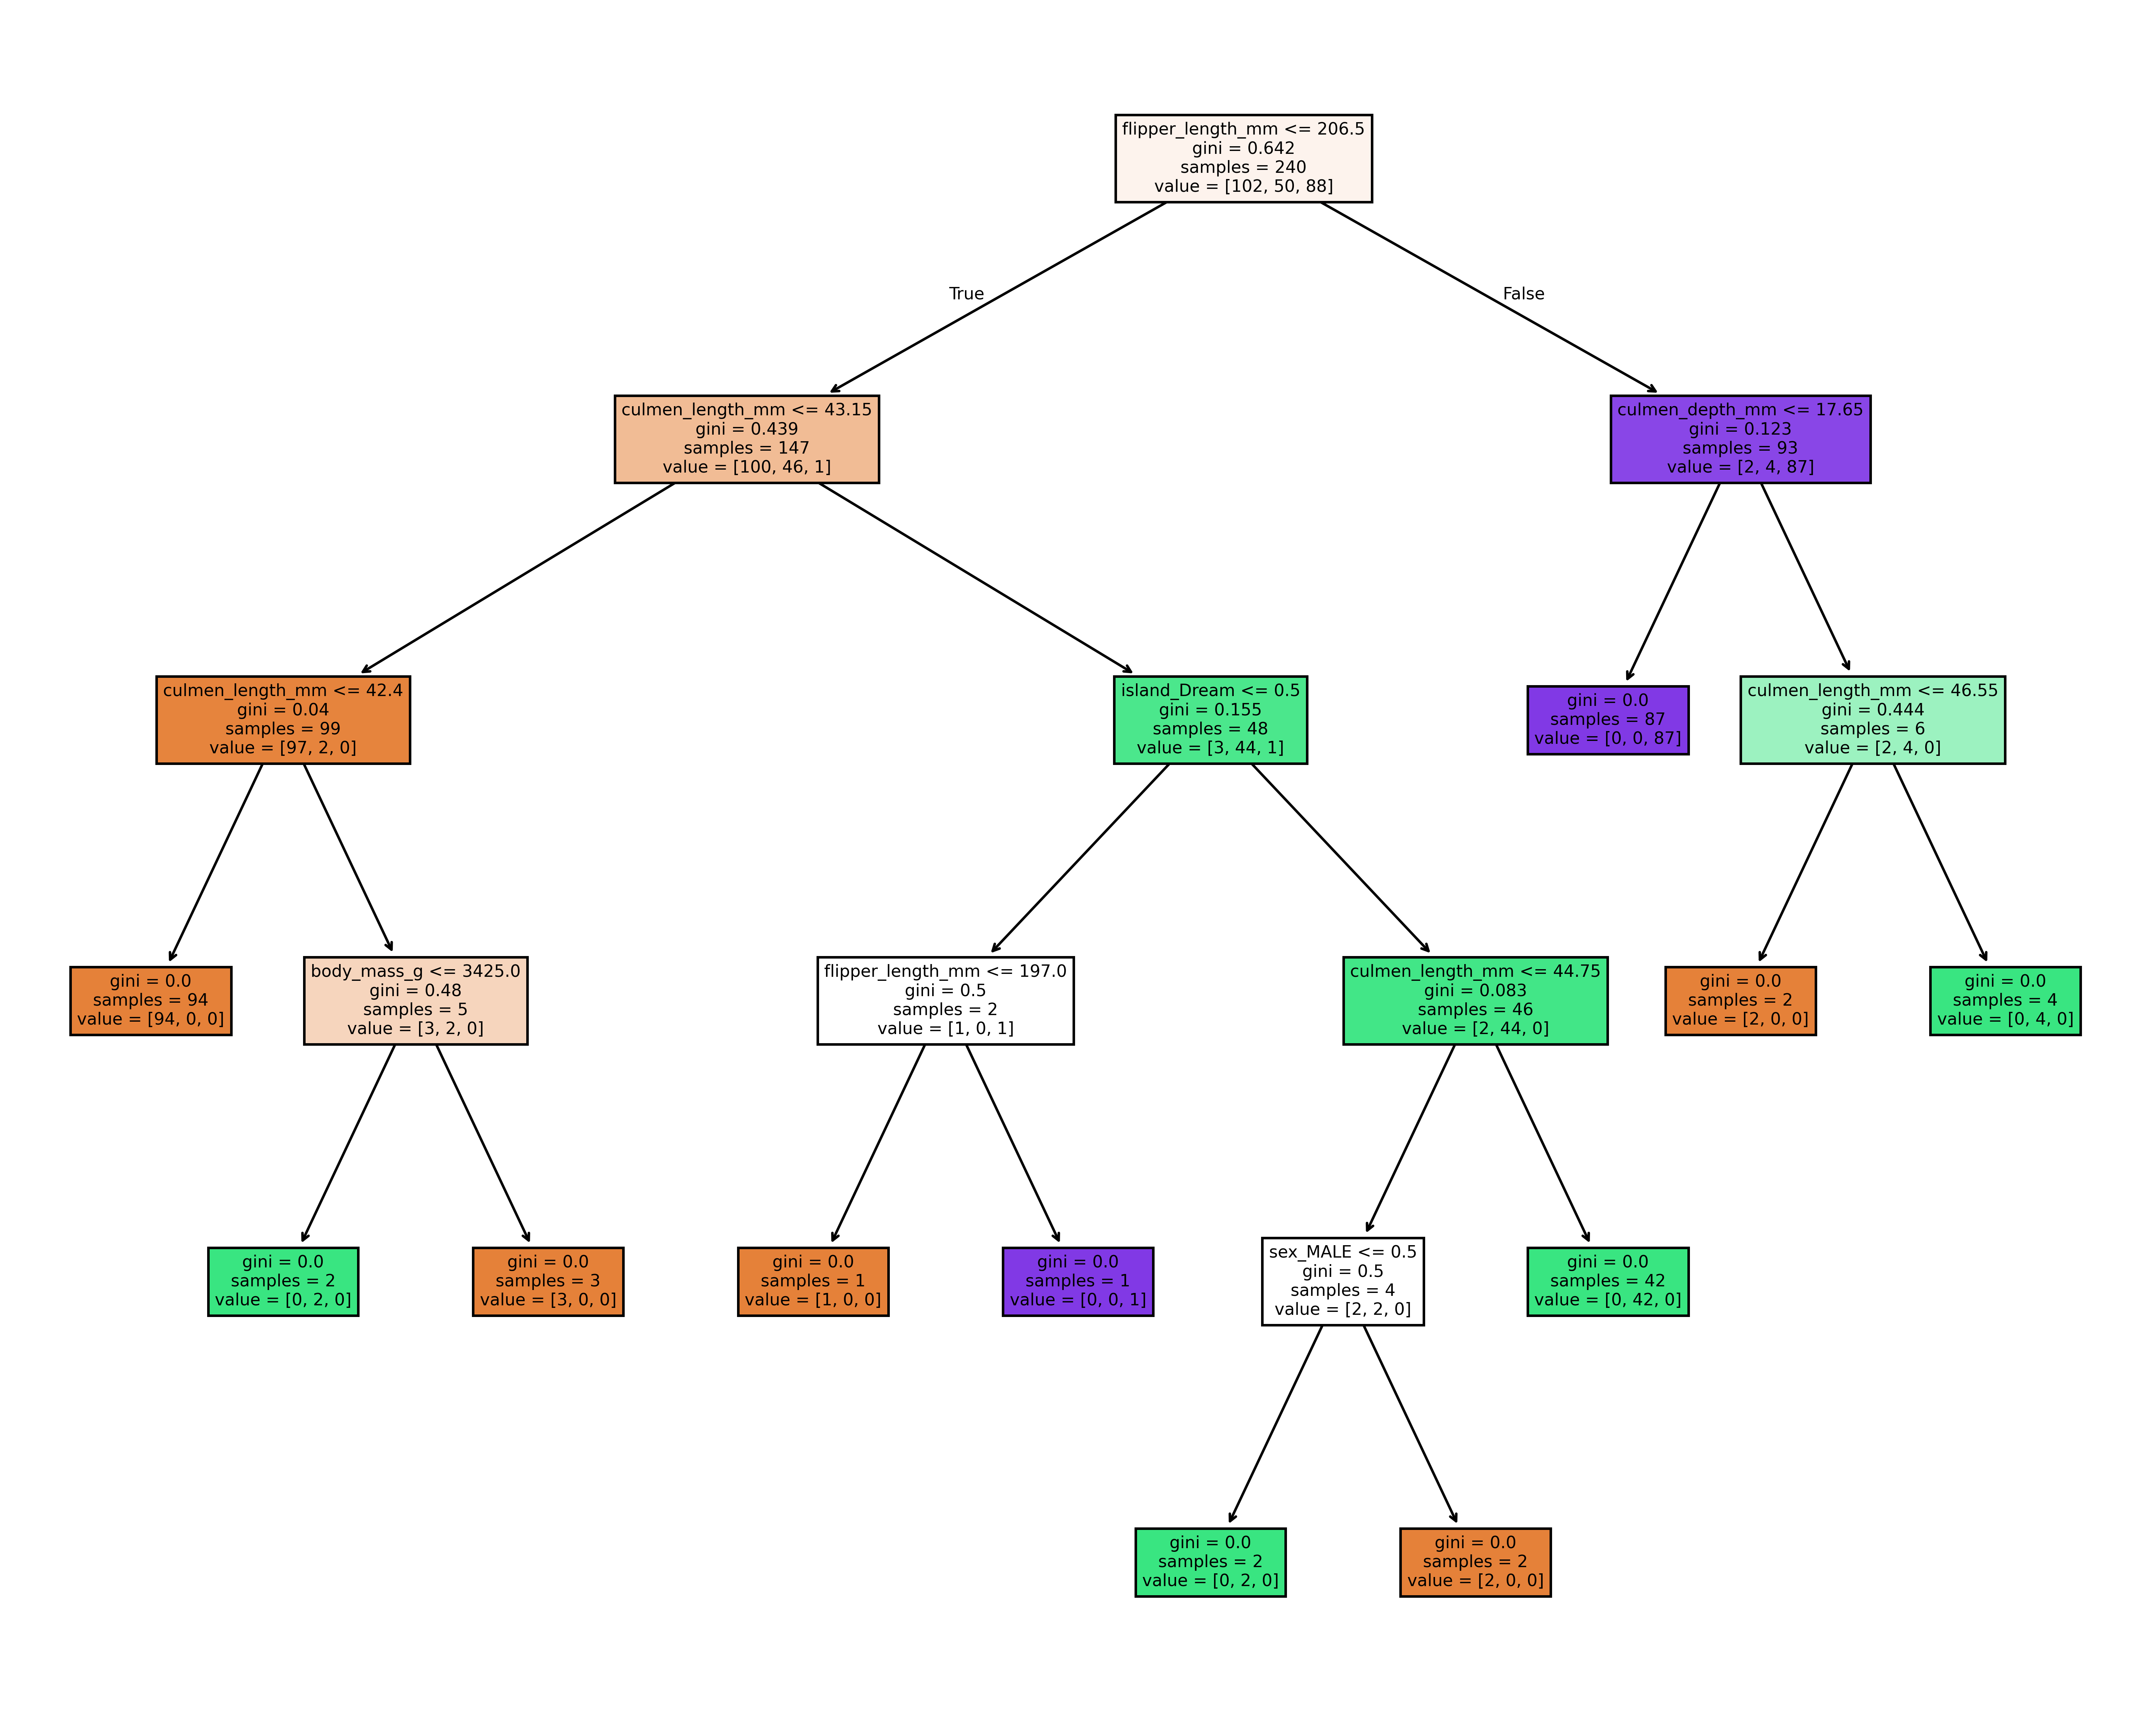

In [50]:
DT_model = DecisionTreeClassifier(random_state=42,max_leaf_nodes=11)
DT_model.fit(X_train,y_train)

train_pred=DT_model.predict(X_train)
test_pred= DT_model.predict(X_test)

print('Train accuracy:' , accuracy_score(y_train,ypred_train))
print('Test accuracy:' , accuracy_score(y_test,ypred_test))

plt.figure(figsize=(15,12),dpi=500)
plot_tree(DT_model,filled=True,feature_names=X.columns)

score= cross_val_score(DT_model,X,y,cv=5)
print(score)
score.mean()

In [51]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[50,  0,  0],
       [ 1, 17,  0],
       [ 1,  0, 34]])

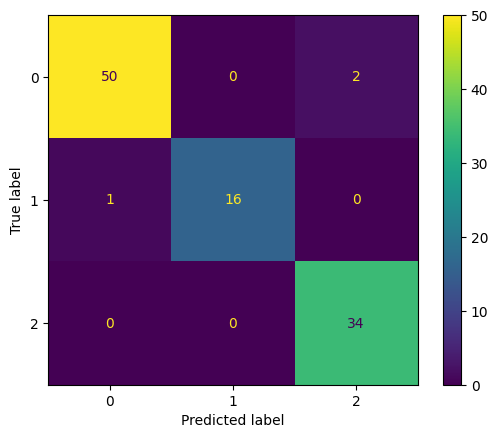

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = DT_model.predict(X_test)

cm = confusion_matrix(ypred_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        50
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      0.97      0.99        35

    accuracy                           0.98       103
   macro avg       0.99      0.97      0.98       103
weighted avg       0.98      0.98      0.98       103

